In [1]:
import pandas as pd

df = pd.read_excel("finaldf_partner_imp_1k.xlsx", index_col=False)
df.drop(columns=["Column1","index_x", "index_y","symbol", "calendarYear", "revenue_to_Revenue_ratio", "marketCap"], axis = 1, inplace = True)
df.head(3)

,Label,Partner,totalCurrentAssets_to_totalAssets_ratio,totalNonCurrentAssets_to_totalAssets_ratio,totalCurrentLiabilities_to_totalLiabilities_ratio,totalNonCurrentLiabilities_to_totalLiabilities_ratio,costOfRevenue_to_Revenue_ratio,grossProfit_to_Revenue_ratio,operatingExpenses_to_Revenue_ratio,ebitda_to_Revenue_ratio,...,investmentsInPropertyPlantAndEquipment_to_Revenue_ratio,commonStockIssued_to_Revenue_ratio,debtRepayment_to_Revenue_ratio,debtToEquity,debtToAssets,daysOfInventoryOnHand,workingCapital_to_revenue_Ratio,employee_revenue_ratio,Number of Product Segments,Number of Geo Segments
0,2,263.0,52.543267,47.456733,65.918286,34.081714,72.963421,27.036579,19.487096,7.270342,...,-2030.050116,0.669815,-1346.597918,0.469952,0.149550,80.392441,16.931293,0.000226,3,3
1,2,263.0,50.142358,49.857642,62.165864,37.834136,74.850994,25.149006,19.476318,15.567115,...,-1607.798758,2.513364,-993.654078,0.680004,0.202260,92.362922,15.423757,0.000234,3,3
2,2,263.0,47.520648,52.479352,68.611247,31.388753,75.073354,24.926646,17.734589,13.704331,...,-294.934587,166.070145,164.719169,0.720136,0.225146,96.741438,7.261509,0.000242,3,3


In [2]:
columns_to_scale = [ "totalCurrentAssets_to_totalAssets_ratio", "totalNonCurrentAssets_to_totalAssets_ratio", "totalCurrentLiabilities_to_totalLiabilities_ratio",
                    "totalNonCurrentLiabilities_to_totalLiabilities_ratio", "costOfRevenue_to_Revenue_ratio",
                    "grossProfit_to_Revenue_ratio", "operatingExpenses_to_Revenue_ratio", "ebitda_to_Revenue_ratio", 
                     "investmentsInPropertyPlantAndEquipment_to_Revenue_ratio",
                    "commonStockIssued_to_Revenue_ratio","debtRepayment_to_Revenue_ratio", "debtToEquity", 
                    "debtToAssets", "workingCapital_to_revenue_Ratio", "employee_revenue_ratio"]

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pylab as plt
import numpy as np

# Separate explanatory (X) and target (y) variables
X = df.copy()
y = X.pop("Label")

# Feature selection
selector = SelectKBest(f_classif, k=20)  # Adjust k as needed
X_new = selector.fit_transform(X, y)

# Get the selected feature names
selected_features = X.columns[selector.get_support()]

# Create a DataFrame with the selected features
X_new_df = pd.DataFrame(X_new, columns=selected_features)

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_new_df)

# Create a DataFrame with the scaled features
X_scaled_df = pd.DataFrame(X_scaled, columns=selected_features)


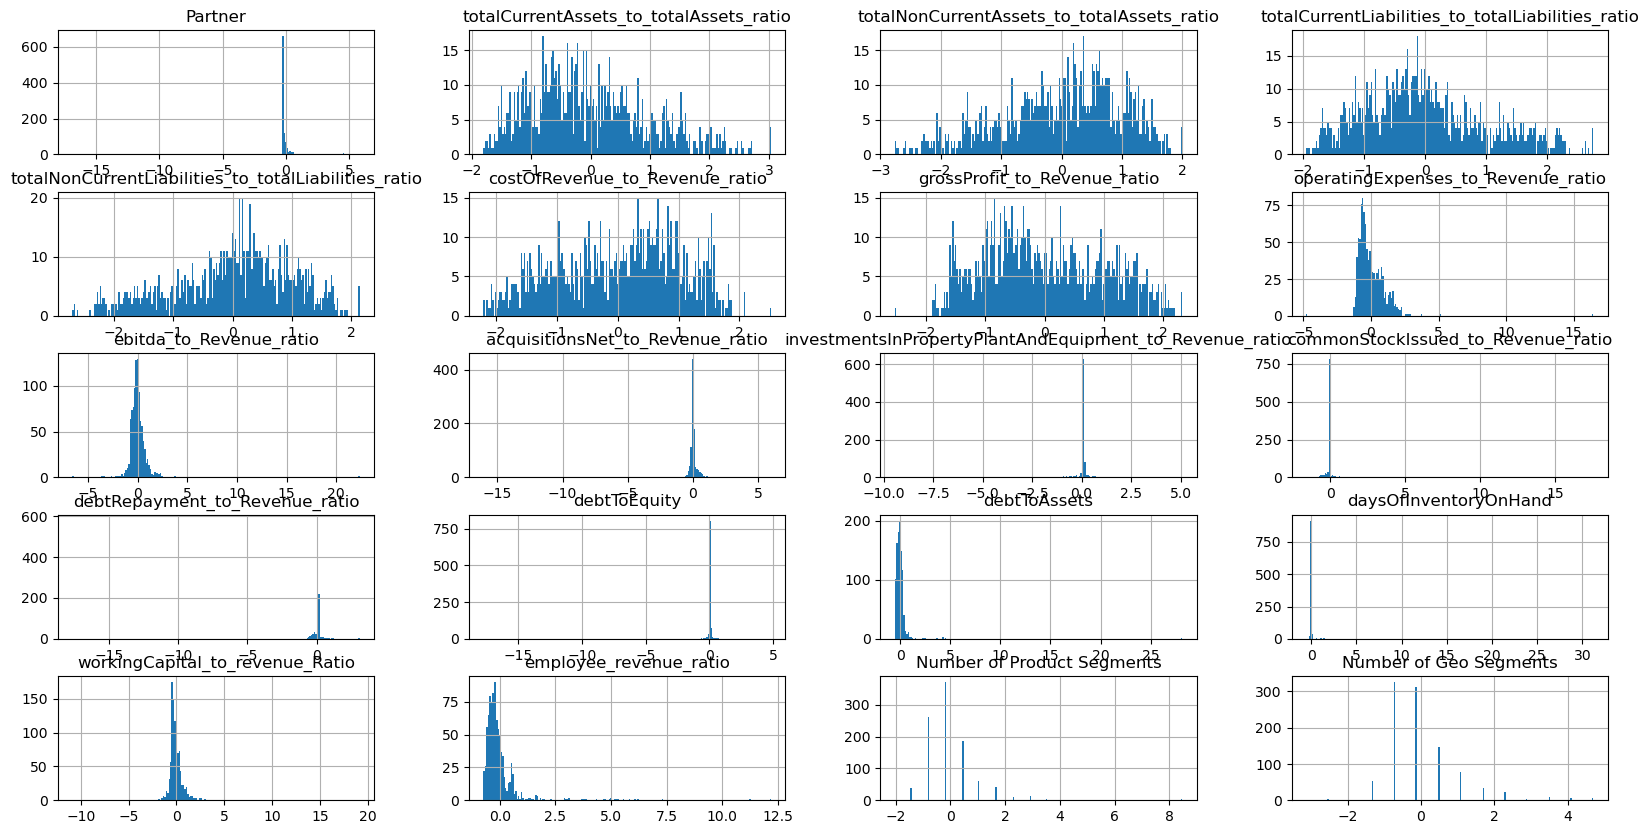

In [4]:
plt.rcParams["figure.figsize"]=(20,10)
X_scaled_df.select_dtypes(exclude="bool").hist(bins=200)
plt.show()

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, learning_curve, cross_val_score
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score
from sklearn.inspection import permutation_importance



strat_k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize the AdaBoost classifier
ada_classifier = AdaBoostClassifier(n_estimators=50, random_state=42, algorithm="SAMME")

# Perform cross-validation
cv_scores = cross_val_score(ada_classifier, X_scaled_df, y, cv=strat_k_fold, scoring='accuracy')

# Print the cross-validation scores
print(f'Cross-validation accuracy scores: {cv_scores}')
print(f'Mean cross-validation accuracy: {cv_scores.mean():.4f}')
print(f'Standard deviation of cross-validation accuracy: {cv_scores.std():.4f}')

# Split the data into training and testing sets for final evaluation
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)

# Train the model on the entire training set
ada_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ada_classifier.predict(X_test)
y_pred_proba = ada_classifier.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Final test set accuracy: {accuracy:.4f}')
print(classification_report(y_test, y_pred))

Cross-validation accuracy scores: [0.805 0.775 0.84  0.725 0.785]
Mean cross-validation accuracy: 0.7860
Standard deviation of cross-validation accuracy: 0.0377
Final test set accuracy: 0.7750
              precision    recall  f1-score   support

           1       0.77      0.68      0.72        50
           2       0.71      0.79      0.75        52
           3       0.80      0.75      0.77        57
           4       0.84      0.90      0.87        41

    accuracy                           0.78       200
   macro avg       0.78      0.78      0.78       200
weighted avg       0.78      0.78      0.77       200



In [ ]:
plt.figure(figsize=(4,2))
plt.boxplot(cv_scores, vert = False)
plt.title("Cross Val - Acc")
plt.xlabel("Acc")
plt.ylabel("K-Fold Cross Validation")
plt.show()

In [ ]:
y_test_binarized = label_binarize(y_test, classes=[1,2,3,4])
n_classes = y_test_binarized.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = roc_auc_score(y_test_binarized[:, i], y_pred_proba[:, i])

# Plot all ROC curves
plt.figure()
colors = ['aqua', 'darkorange', 'cornflowerblue', 'red', 'green', 'purple', 'brown', 'pink', 'gray', 'olive']
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i % len(colors)], lw=2,
             label=f'ROC curve of class {i} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

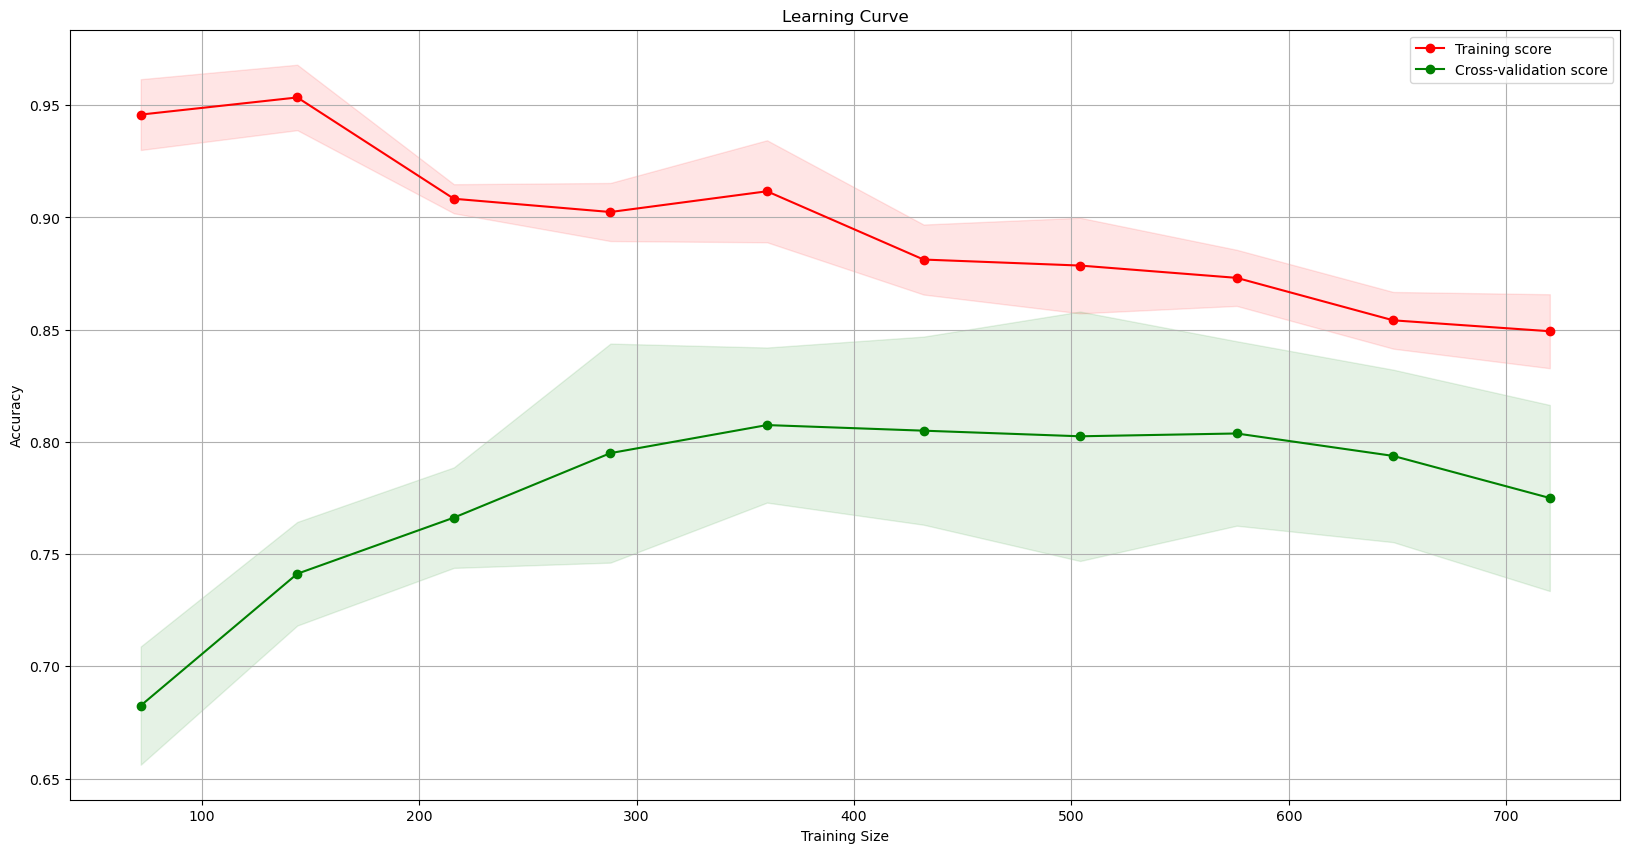

In [24]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Generate learning curve data
train_sizes, train_scores, val_scores = learning_curve(
    ada_classifier, X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate mean and standard deviation for training and validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(20, 10))
plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, val_mean, 'o-', color='g', label='Cross-validation score')

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color='g')

plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)  # Add grid for better readability
plt.show()


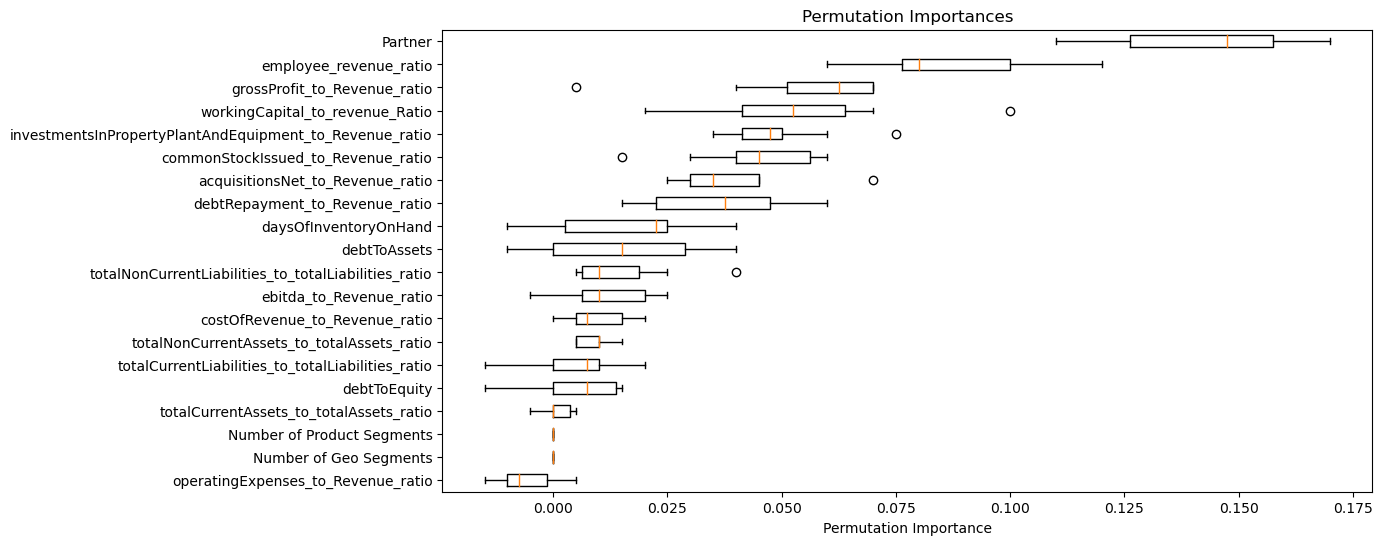

In [27]:
perm_importance = permutation_importance(ada_classifier, X_test, y_test, n_repeats=10, random_state=42)

sorted_idx = perm_importance.importances_mean.argsort()

# Plot permutation importances using a boxplot
plt.figure(figsize=(12, 6))
plt.boxplot(perm_importance.importances[sorted_idx].T, vert=False, labels=selected_features[sorted_idx])
plt.xlabel("Permutation Importance")
plt.title("Permutation Importances")
plt.show()